### Importing the Libraries

In [74]:
import os, cv2, random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

### Reading the Training Dataset

In [75]:
directory = "./Training Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_train = []
y_train = []

for image, label in dataset:
    x_train.append(image)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

### Reading the Validation Dataset

In [76]:
directory = "./Validation Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_val = []
y_val = []

for image, label in dataset:
    x_val.append(image)
    y_val.append(label)

x_val = np.array(x_val)
y_val = np.array(y_val)

### Reading the Test Dataset

In [77]:
directory = "./Test Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_test = []
y_test = []

for image, label in dataset:
    x_test.append(image)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)

### Function for Generating Label

In [78]:
def get_label(label):
    if not label:
        return "Grape"
    return "Raisin"

### Displaying some samples

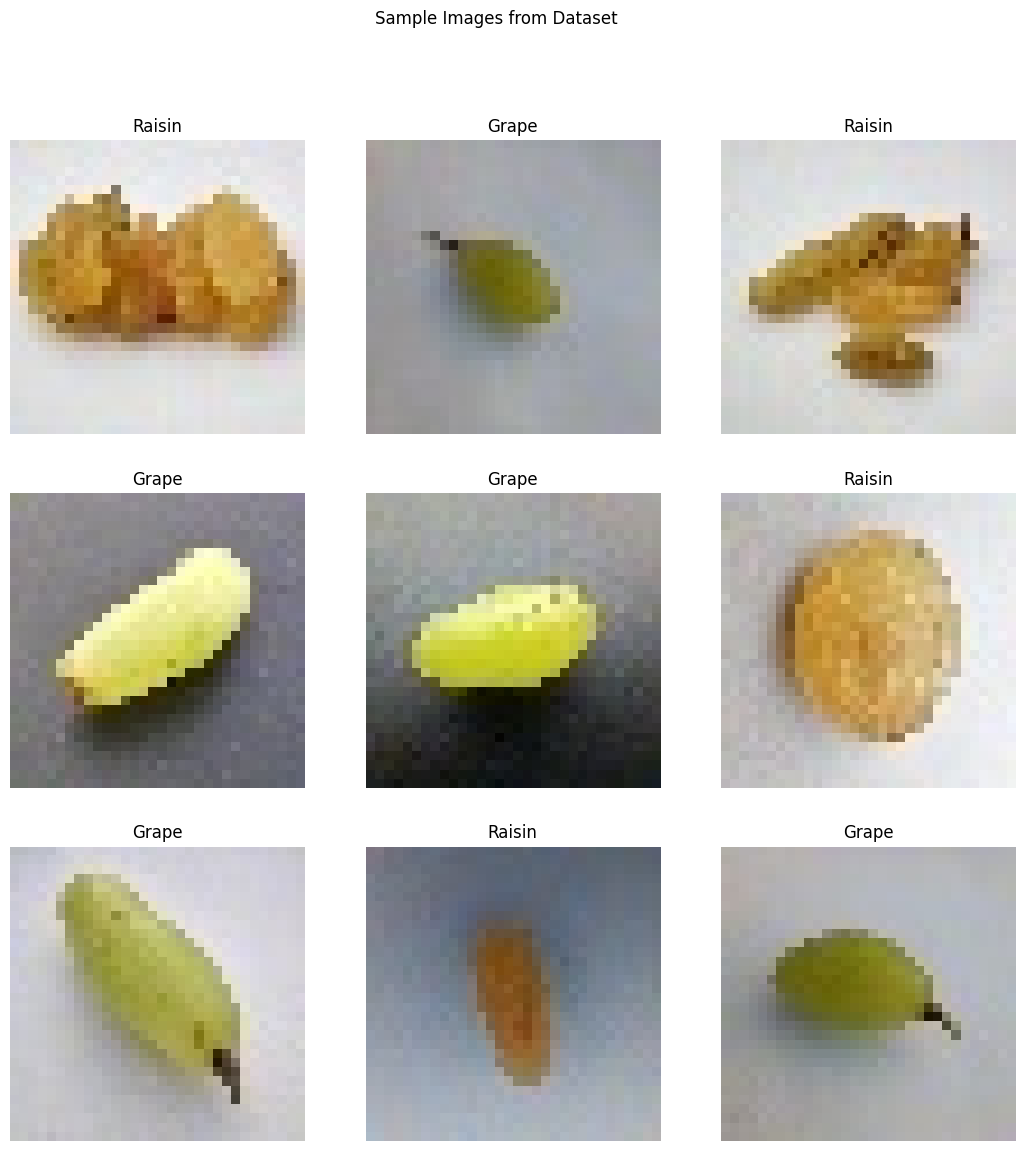

In [79]:
plt.figure(figsize = (13, 13))
for k in range(1, 10):
    plt.subplot(3, 3, k)
    plt.imshow(cv2.cvtColor(x_train[k], cv2.COLOR_BGR2RGB))
    plt.title(get_label(y_train[k]))
    plt.axis("off")

plt.suptitle("Sample Images from Dataset")
plt.show()

### Showing Training, Validation & Test Set Shape

In [80]:
print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (1070, 32, 32, 3) (1070,)
Validation set: (260, 32, 32, 3) (260,)
Test set: (420, 32, 32, 3) (420,)


### Building the Model

In [81]:
inputs = Input(shape = (32, 32, 3))
x = Conv2D(64, (3, 3), activation = "relu")(inputs)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation = "relu")(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation = "relu")(x)
x = Dense(256, activation = "relu")(x)
x = Dense(128, activation = "relu")(x)
outputs = Dense(1, activation = "sigmoid")(x)

model = Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = Adam(0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_43 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 conv2d_45 (Conv2D)          (None, 10, 10, 64)        36928     
                                                           

In [82]:
history = model.fit(x_train, y_train, epochs = 50, validation_data = (x_val, y_val))

Epoch 1/50
34/34 [==============================] - 6s 98ms/step - loss: 0.5303 - accuracy: 0.7439 - val_loss: 0.2549 - val_accuracy: 0.9385
Epoch 2/50
34/34 [==============================] - 4s 127ms/step - loss: 0.1303 - accuracy: 0.9636 - val_loss: 0.0873 - val_accuracy: 0.9731
Epoch 3/50
34/34 [==============================] - 4s 116ms/step - loss: 0.1098 - accuracy: 0.9542 - val_loss: 0.0364 - val_accuracy: 0.9885
Epoch 4/50
34/34 [==============================] - 3s 83ms/step - loss: 0.0598 - accuracy: 0.9766 - val_loss: 0.0831 - val_accuracy: 0.9731
Epoch 5/50
34/34 [==============================] - 3s 84ms/step - loss: 0.0108 - accuracy: 0.9981 - val_loss: 0.0809 - val_accuracy: 0.9731
Epoch 6/50
34/34 [==============================] - 3s 96ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.1012 - val_accuracy: 0.9731
Epoch 7/50
34/34 [==============================] - 3s 81ms/step - loss: 0.0110 - accuracy: 0.9972 - val_loss: 0.0556 - val_accuracy: 0.9846
Epoch 8/50


### Plotting The Accuracy & Loss Graph

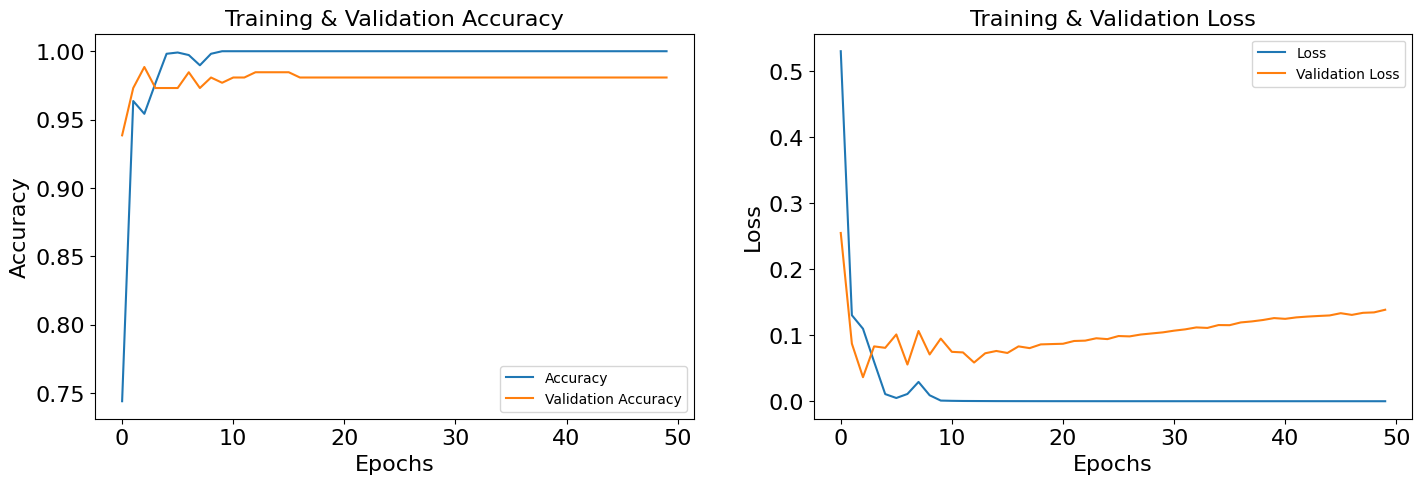

In [83]:
plt.figure(figsize = (17, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label = "Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Training & Validation Accuracy", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Epochs", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training & Validation Loss", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Epochs", fontsize = 16)
plt.ylabel("Loss", fontsize = 16)
plt.legend()
plt.show()

### Evaluating the Model on Test Set

In [84]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {round(test_accuracy * 100, 2)}%")

14/14 [==============================] - 0s 18ms/step - loss: 1.6104 - accuracy: 0.8214
Test Accuracy: 82.14%
